In [17]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm
import matplotlib.pyplot as plt

In [18]:
with open('ClassificationRules.txt', 'r') as file:
    class_rules=[]
    for line in file:
        class_rules.append([int(float(n)) for n in line.strip().split()])
        
class_rules=np.array(class_rules)
print(len(class_rules), len(class_rules[0])) #266 reguł klasyfikacji, każda to ciąg dł. 9350 zawierający liczby ze zbioru klas {1,2,3}

266 9350


In [19]:
with open('ImageExpertReduced.txt', 'r') as file:
    for line in file:
        exemplary=np.array([float(n) for n in line.strip().split()]) #wzorcowa klasyfikacja
print(len(exemplary))

9350


In [20]:
def binary_random(p):
    return (random.uniform(0, 1) < p)

def initial_prob_vector(d):
    return np.full(d, 0.5)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

def random_individual(mean_vector, var, d):
    weights = [random.gauss(mean_vector[i], var) for i in range(d)]
    return softmax(weights)
    
def random_population(mean_vector, var, N,d):
    return np.array([random_individual(mean_vector, var, d) for i in range(N)])

def population_evaluation(P, f, exemplary, class_rules):
    values = [f(i, exemplary, class_rules) for i in P]
    return np.array(values)

def pbil(f,N,T,t1,t2,t3,d, exemplary, class_rules):
    f_vals=[]
    mean_vector = np.ones(d) / d 
    var = 0.001
    P = random_population(mean_vector,var,N,d)
    pop_eval = population_evaluation(P,f, exemplary, class_rules)
    
    for t in tqdm(range(T)):
        best = P[np.argmax(pop_eval)]
        mean_vector = mean_vector*(1-t1)+best*t1
        mutate_mask = np.random.rand(d) < t2
        mean_vector[mutate_mask] = mean_vector[mutate_mask] * (1 - t3) + binary_random(0.5) * t3
        P = random_population(mean_vector,var,N,d)
        pop_eval = population_evaluation(P,f, exemplary, class_rules)
        f_val=classification_quality(P[np.argmax(pop_eval)], exemplary, class_rules)
        print(f_val)
        f_vals.append(f_val)
        
    return P[np.argmax(pop_eval)], f_vals

def classification_quality(rules_weights, exemplary, class_rules):
    d=len(class_rules[0])
    vote_tab=np.zeros((3, d))
    for num, rule in enumerate(class_rules) :
        for i in range(d):
            vote_tab[rule[i]-1][i]+=rules_weights[num]
    
    classification = np.argmax(vote_tab, axis=0)+1
    return np.sum(classification == exemplary)
    
    

In [23]:
N=100
T=150
t1=0.3
t2=0.3
t3=0.2
d=266
'''
θ1 - współczynnik uczenia
θ2 - prawdopodobieństwo mutacji
θ3 - współczynnik zaburzenia podczas mutacji
'''
result, f_vals=pbil(classification_quality,N,T,t1,t2,t3,d, exemplary, class_rules)

  1%|▎                                        | 1/150 [01:21<3:21:17, 81.06s/it]

7906


  1%|▌                                        | 2/150 [02:41<3:19:05, 80.71s/it]

7945


  2%|▊                                        | 3/150 [04:01<3:17:18, 80.54s/it]

7927


  3%|█                                        | 4/150 [05:21<3:15:24, 80.30s/it]

7958


  3%|█▎                                       | 5/150 [06:42<3:14:00, 80.28s/it]

7971


  4%|█▋                                       | 6/150 [08:03<3:13:30, 80.63s/it]

7908


  5%|█▉                                       | 7/150 [09:25<3:13:34, 81.22s/it]

7926


  5%|██▏                                      | 8/150 [10:47<3:12:51, 81.49s/it]

7961


  6%|██▍                                      | 9/150 [12:09<3:11:39, 81.56s/it]

7936


  7%|██▋                                     | 10/150 [13:31<3:10:47, 81.77s/it]

7941


  7%|██▉                                     | 11/150 [14:55<3:10:28, 82.22s/it]

7975


  8%|███▏                                    | 12/150 [16:16<3:08:54, 82.13s/it]

7911


  9%|███▍                                    | 13/150 [17:38<3:07:23, 82.07s/it]

7928


  9%|███▋                                    | 14/150 [19:00<3:05:47, 81.97s/it]

7979


 10%|████                                    | 15/150 [20:22<3:04:21, 81.93s/it]

7975


 11%|████▎                                   | 16/150 [21:44<3:02:54, 81.90s/it]

7966


 11%|████▌                                   | 17/150 [23:06<3:01:34, 81.92s/it]

7963


 12%|████▊                                   | 18/150 [24:27<2:59:51, 81.75s/it]

7964


 13%|█████                                   | 19/150 [25:48<2:57:59, 81.53s/it]

7964


 13%|█████▎                                  | 20/150 [27:09<2:56:19, 81.38s/it]

7928


 14%|█████▌                                  | 21/150 [28:30<2:54:42, 81.26s/it]

8000


 15%|█████▊                                  | 22/150 [29:52<2:53:29, 81.33s/it]

7997


 15%|██████▏                                 | 23/150 [31:14<2:52:46, 81.63s/it]

7990


 16%|██████▍                                 | 24/150 [32:35<2:51:03, 81.46s/it]

8007


 17%|██████▋                                 | 25/150 [33:56<2:49:25, 81.32s/it]

7994


 17%|██████▉                                 | 26/150 [35:18<2:48:34, 81.57s/it]

7993


 18%|███████▏                                | 27/150 [36:40<2:47:17, 81.61s/it]

7922


 19%|███████▍                                | 28/150 [38:01<2:45:20, 81.31s/it]

7933


 19%|███████▋                                | 29/150 [39:21<2:43:42, 81.18s/it]

7940


 20%|████████                                | 30/150 [40:43<2:42:28, 81.23s/it]

7986


 21%|████████▎                               | 31/150 [42:03<2:40:33, 80.95s/it]

7958


 21%|████████▌                               | 32/150 [43:23<2:38:47, 80.74s/it]

7961


 22%|████████▊                               | 33/150 [44:44<2:37:15, 80.65s/it]

8028


 23%|█████████                               | 34/150 [46:04<2:35:38, 80.51s/it]

8010


 23%|█████████▎                              | 35/150 [47:23<2:33:45, 80.22s/it]

7979


 24%|█████████▌                              | 36/150 [48:44<2:32:27, 80.24s/it]

8069


 25%|█████████▊                              | 37/150 [50:04<2:31:10, 80.27s/it]

8029


 25%|██████████▏                             | 38/150 [51:24<2:29:49, 80.26s/it]

8058


 26%|██████████▍                             | 39/150 [52:45<2:28:31, 80.28s/it]

8028


 27%|██████████▋                             | 40/150 [54:05<2:27:13, 80.30s/it]

8009


 27%|██████████▉                             | 41/150 [55:25<2:25:53, 80.31s/it]

7999


 28%|███████████▏                            | 42/150 [56:45<2:24:04, 80.04s/it]

7968


 29%|███████████▍                            | 43/150 [58:05<2:23:00, 80.19s/it]

7968


 29%|███████████▋                            | 44/150 [59:26<2:21:43, 80.23s/it]

7979


 30%|███████████▍                          | 45/150 [1:00:45<2:20:11, 80.11s/it]

7988


 31%|███████████▋                          | 46/150 [1:02:06<2:18:56, 80.16s/it]

7951


 31%|███████████▉                          | 47/150 [1:03:25<2:17:17, 79.97s/it]

7944


 32%|████████████▏                         | 48/150 [1:04:45<2:16:05, 80.06s/it]

7930


 33%|████████████▍                         | 49/150 [1:06:05<2:14:27, 79.88s/it]

7940


 33%|████████████▋                         | 50/150 [1:07:25<2:13:02, 79.82s/it]

7937


 34%|████████████▉                         | 51/150 [1:08:44<2:11:34, 79.75s/it]

7963


 35%|█████████████▏                        | 52/150 [1:10:04<2:10:31, 79.91s/it]

7962


 35%|█████████████▍                        | 53/150 [1:11:24<2:08:59, 79.79s/it]

7963


 36%|█████████████▋                        | 54/150 [1:12:44<2:07:31, 79.71s/it]

7966


 37%|█████████████▉                        | 55/150 [1:14:03<2:06:07, 79.66s/it]

7966


 37%|██████████████▏                       | 56/150 [1:15:23<2:04:42, 79.60s/it]

7967


 38%|██████████████▍                       | 57/150 [1:16:44<2:04:05, 80.06s/it]

7968


 39%|██████████████▋                       | 58/150 [1:18:03<2:02:31, 79.90s/it]

7968


 39%|██████████████▉                       | 59/150 [1:19:23<2:00:59, 79.78s/it]

7972


 40%|███████████████▏                      | 60/150 [1:20:43<1:59:50, 79.90s/it]

7971


 41%|███████████████▍                      | 61/150 [1:22:03<1:58:43, 80.04s/it]

8014


 41%|███████████████▋                      | 62/150 [1:23:23<1:57:21, 80.01s/it]

8014


 42%|███████████████▉                      | 63/150 [1:24:43<1:55:45, 79.84s/it]

8004


 43%|████████████████▏                     | 64/150 [1:26:02<1:54:15, 79.71s/it]

8032


 43%|████████████████▍                     | 65/150 [1:27:22<1:52:50, 79.66s/it]

8056


 44%|████████████████▋                     | 66/150 [1:28:42<1:51:46, 79.84s/it]

8039


 45%|████████████████▉                     | 67/150 [1:30:02<1:50:28, 79.87s/it]

8019


 45%|█████████████████▏                    | 68/150 [1:31:21<1:48:58, 79.73s/it]

8010


 46%|█████████████████▍                    | 69/150 [1:32:42<1:47:57, 79.96s/it]

7968


 47%|█████████████████▋                    | 70/150 [1:34:01<1:46:32, 79.91s/it]

7969


 47%|█████████████████▉                    | 71/150 [1:35:22<1:45:24, 80.06s/it]

7975


 48%|██████████████████▏                   | 72/150 [1:36:42<1:44:12, 80.15s/it]

7949


 49%|██████████████████▍                   | 73/150 [1:38:02<1:42:49, 80.13s/it]

7953


 49%|██████████████████▋                   | 74/150 [1:39:23<1:41:36, 80.21s/it]

7959


 50%|███████████████████                   | 75/150 [1:40:42<1:40:03, 80.05s/it]

7959


 51%|███████████████████▎                  | 76/150 [1:42:02<1:38:32, 79.90s/it]

7979


 51%|███████████████████▌                  | 77/150 [1:43:21<1:37:04, 79.79s/it]

7969


 52%|███████████████████▊                  | 78/150 [1:44:41<1:35:38, 79.71s/it]

7966


 53%|████████████████████                  | 79/150 [1:46:01<1:34:32, 79.90s/it]

7933


 53%|████████████████████▎                 | 80/150 [1:47:21<1:33:03, 79.76s/it]

7939


 54%|████████████████████▌                 | 81/150 [1:48:41<1:31:55, 79.94s/it]

7953


 55%|████████████████████▊                 | 82/150 [1:50:03<1:31:23, 80.65s/it]

7952


 55%|█████████████████████                 | 83/150 [1:51:23<1:29:42, 80.34s/it]

7933


 56%|█████████████████████▎                | 84/150 [1:52:43<1:28:21, 80.33s/it]

7944


 57%|█████████████████████▌                | 85/150 [1:54:03<1:26:50, 80.17s/it]

7961


 57%|█████████████████████▊                | 86/150 [1:55:23<1:25:33, 80.22s/it]

7960


 58%|██████████████████████                | 87/150 [1:56:43<1:23:58, 79.97s/it]

7960


 59%|██████████████████████▎               | 88/150 [1:58:02<1:22:29, 79.84s/it]

7960


 59%|██████████████████████▌               | 89/150 [1:59:22<1:21:07, 79.80s/it]

7931


 60%|██████████████████████▊               | 90/150 [2:00:42<1:19:56, 79.94s/it]

7955


 61%|███████████████████████               | 91/150 [2:02:03<1:18:44, 80.07s/it]

7989


 61%|███████████████████████▎              | 92/150 [2:03:23<1:17:28, 80.14s/it]

7977


 62%|███████████████████████▌              | 93/150 [2:04:43<1:16:11, 80.20s/it]

8003


 63%|███████████████████████▊              | 94/150 [2:06:04<1:14:51, 80.21s/it]

7989


 63%|████████████████████████              | 95/150 [2:07:24<1:13:33, 80.25s/it]

7984


 64%|████████████████████████▎             | 96/150 [2:08:44<1:12:14, 80.27s/it]

7973


 65%|████████████████████████▌             | 97/150 [2:10:05<1:11:06, 80.49s/it]

7967


 65%|████████████████████████▊             | 98/150 [2:11:25<1:09:31, 80.22s/it]

7964


 66%|█████████████████████████             | 99/150 [2:12:44<1:07:58, 79.96s/it]

7922


 67%|████████████████████████▋            | 100/150 [2:14:04<1:06:31, 79.83s/it]

7922


 67%|████████████████████████▉            | 101/150 [2:15:23<1:05:05, 79.71s/it]

7987


 68%|█████████████████████████▏           | 102/150 [2:16:44<1:03:55, 79.91s/it]

7975


 69%|█████████████████████████▍           | 103/150 [2:18:04<1:02:36, 79.93s/it]

7979


 69%|█████████████████████████▋           | 104/150 [2:19:24<1:01:20, 80.02s/it]

7973


 70%|███████████████████████████▎           | 105/150 [2:20:43<59:51, 79.82s/it]

7960


 71%|███████████████████████████▌           | 106/150 [2:22:03<58:27, 79.71s/it]

7962


 71%|███████████████████████████▊           | 107/150 [2:23:22<57:02, 79.60s/it]

7929


 72%|████████████████████████████           | 108/150 [2:24:42<55:52, 79.82s/it]

8010


 73%|████████████████████████████▎          | 109/150 [2:26:02<54:27, 79.69s/it]

7997


 73%|████████████████████████████▌          | 110/150 [2:27:21<53:04, 79.62s/it]

7968


 74%|████████████████████████████▊          | 111/150 [2:28:41<51:52, 79.80s/it]

7968


 75%|█████████████████████████████          | 112/150 [2:30:01<50:34, 79.86s/it]

7968


 75%|█████████████████████████████▍         | 113/150 [2:31:21<49:18, 79.96s/it]

8021


 76%|█████████████████████████████▋         | 114/150 [2:32:42<48:01, 80.05s/it]

8006


 77%|█████████████████████████████▉         | 115/150 [2:34:02<46:39, 79.97s/it]

7999


 77%|██████████████████████████████▏        | 116/150 [2:35:21<45:13, 79.81s/it]

7966


 78%|██████████████████████████████▍        | 117/150 [2:36:41<43:57, 79.92s/it]

8012


 79%|██████████████████████████████▋        | 118/150 [2:38:01<42:41, 80.04s/it]

8003


 79%|██████████████████████████████▉        | 119/150 [2:39:22<41:22, 80.07s/it]

7991


 80%|███████████████████████████████▏       | 120/150 [2:40:42<40:03, 80.12s/it]

7990


 81%|███████████████████████████████▍       | 121/150 [2:42:01<38:37, 79.91s/it]

7964


 81%|███████████████████████████████▋       | 122/150 [2:43:21<37:14, 79.81s/it]

7964


 82%|███████████████████████████████▉       | 123/150 [2:44:41<35:57, 79.92s/it]

7989


 83%|████████████████████████████████▏      | 124/150 [2:46:01<34:34, 79.79s/it]

8018


 83%|████████████████████████████████▌      | 125/150 [2:47:21<33:17, 79.91s/it]

7990


 84%|████████████████████████████████▊      | 126/150 [2:48:41<32:00, 80.00s/it]

7973


 85%|█████████████████████████████████      | 127/150 [2:50:00<30:35, 79.80s/it]

7963


 85%|█████████████████████████████████▎     | 128/150 [2:51:20<29:13, 79.69s/it]

7918


 86%|█████████████████████████████████▌     | 129/150 [2:52:39<27:51, 79.60s/it]

7916


 87%|█████████████████████████████████▊     | 130/150 [2:53:59<26:35, 79.78s/it]

7968


 87%|██████████████████████████████████     | 131/150 [2:55:19<25:18, 79.90s/it]

7967


 88%|██████████████████████████████████▎    | 132/150 [2:56:39<23:55, 79.77s/it]

7964


 89%|██████████████████████████████████▌    | 133/150 [2:57:59<22:38, 79.89s/it]

8055


 89%|██████████████████████████████████▊    | 134/150 [2:59:19<21:16, 79.78s/it]

8015


 90%|███████████████████████████████████    | 135/150 [3:00:38<19:54, 79.65s/it]

7981


 91%|███████████████████████████████████▎   | 136/150 [3:01:57<18:34, 79.59s/it]

7898


 91%|███████████████████████████████████▌   | 137/150 [3:03:17<17:14, 79.58s/it]

7944


 92%|███████████████████████████████████▉   | 138/150 [3:04:36<15:54, 79.55s/it]

8002


 93%|████████████████████████████████████▏  | 139/150 [3:05:56<14:34, 79.51s/it]

7984


 93%|████████████████████████████████████▍  | 140/150 [3:07:15<13:15, 79.51s/it]

7982


 94%|████████████████████████████████████▋  | 141/150 [3:08:35<11:55, 79.48s/it]

7983


 95%|████████████████████████████████████▉  | 142/150 [3:09:55<10:38, 79.82s/it]

7992


 95%|█████████████████████████████████████▏ | 143/150 [3:11:16<09:19, 79.98s/it]

7967


 96%|█████████████████████████████████████▍ | 144/150 [3:12:35<07:58, 79.83s/it]

7964


 97%|█████████████████████████████████████▋ | 145/150 [3:13:55<06:39, 79.95s/it]

7963


 97%|█████████████████████████████████████▉ | 146/150 [3:15:15<05:19, 79.82s/it]

7966


 98%|██████████████████████████████████████▏| 147/150 [3:16:35<03:59, 79.95s/it]

8018


 99%|██████████████████████████████████████▍| 148/150 [3:17:56<02:40, 80.10s/it]

8001


 99%|██████████████████████████████████████▋| 149/150 [3:19:16<01:20, 80.17s/it]

8038


100%|███████████████████████████████████████| 150/150 [3:20:36<00:00, 80.25s/it]

8017


In [24]:
classification_quality(result, exemplary, class_rules)

8017

In [25]:
print(classification_quality(result, exemplary, class_rules)/9350)

0.8574331550802139


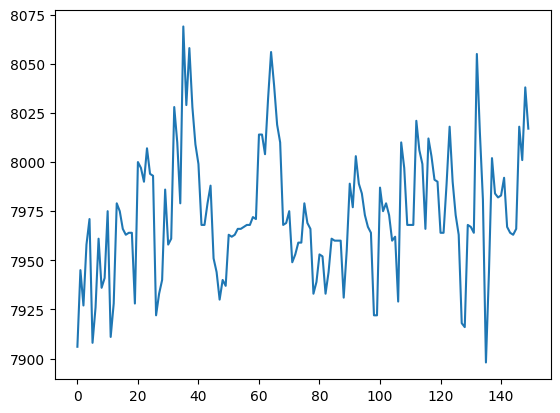

In [26]:
plt.plot(f_vals)
plt.show()


In [36]:
import numpy as np
weights=[0.3,0.2,0.5]
class_rules=[[1,2,2,3,1],[3,3,3,1,1], [3,1,2,3,3]]
exemplary=[1,3,3,1,1]

print(classification_quality(weights, exemplary, class_rules))



[[0.3 0.  0.  0.  0.3]
 [0.  0.3 0.3 0.  0. ]
 [0.  0.  0.  0.3 0. ]]
[[0.3 0.  0.  0.2 0.5]
 [0.  0.3 0.3 0.  0. ]
 [0.2 0.2 0.2 0.3 0. ]]
[[0.3 0.5 0.  0.2 0.5]
 [0.  0.3 0.8 0.  0. ]
 [0.7 0.2 0.2 0.8 0.5]]
1
